In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing data

In [2]:
#reading the file
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
#structure of the dataset
print(data.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
# checking missing value
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
# Analyzing the distribution of  attribute
print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

#Presenting Outliers

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

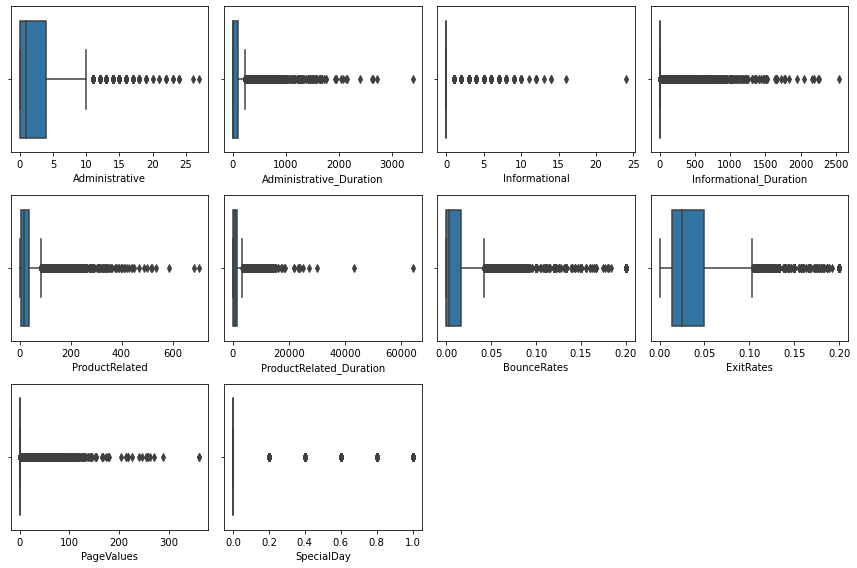

Outliers:
      Administrative  Administrative_Duration  Informational  \
62                12               279.416667              0   
248               16               155.631313              0   
282               13              1249.809524              4   
288               11               215.523809              1   
478               13               315.966667              1   
...              ...                      ...            ...   
5426               2                40.000000              0   
5433               4                24.166667              0   
5436               0                 0.000000              0   
5448               3                35.500000              0   
5450               2                42.000000              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
62                       0.0              42              1553.583333   
248                      0.0              32               908.013456   
28

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
                  "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues",
                  "SpecialDay"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()

outlier_threshold = 1.5 

outliers = []
for column in numerical_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers.append(column_outliers)

outliers = pd.concat(outliers).drop_duplicates()
print("Outliers:")
print(outliers)

In [7]:
# For categorical columns, checking unique values 
categorical_columns = ['Month','VisitorType', 'Weekend', 'Revenue']
for x in categorical_columns:
    unique_values = data[x].unique()
    print(f"Unique values in {x}:\n{unique_values}")

Unique values in Month:
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique values in VisitorType:
['Returning_Visitor' 'New_Visitor' 'Other']
Unique values in Weekend:
[False  True]
Unique values in Revenue:
[False  True]


In [8]:
# checking the value range in special day column 
column_values = data['SpecialDay']

min_value = column_values.min()
max_value = column_values.max()
if min_value >= 0 and max_value <= 1:
    print("All values in the column are within the range of 0 to 1.")
    
else:
    print("There are values outside the range of 0 to 1 in the column.")

All values in the column are within the range of 0 to 1.


In [9]:
columns_to_normalize = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
                        "ProductRelated", "ProductRelated_Duration"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
normalized_data = scaler.fit_transform(data[columns_to_normalize])

# Replace the original columns with normalized values
data[columns_to_normalize] = normalized_data


In [10]:
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


# Data Exploration

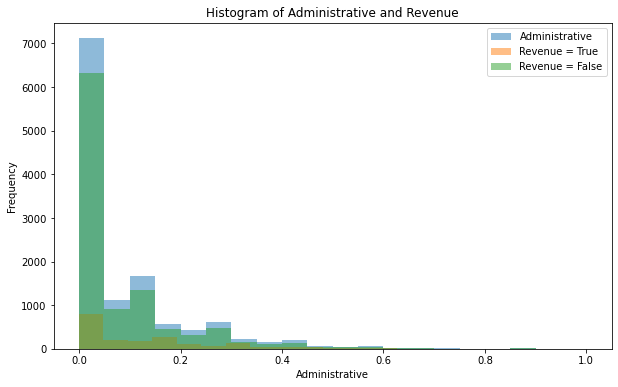

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Administrative'], bins=20, alpha=0.5, label='Administrative')
plt.hist(data[data['Revenue'] == True]['Administrative'], bins=20, alpha=0.5, label='Revenue = True')
plt.hist(data[data['Revenue'] == False]['Administrative'], bins=20, alpha=0.5, label='Revenue = False')
plt.xlabel('Administrative')
plt.ylabel('Frequency')
plt.title('Histogram of Administrative and Revenue')
plt.legend()
plt.show()

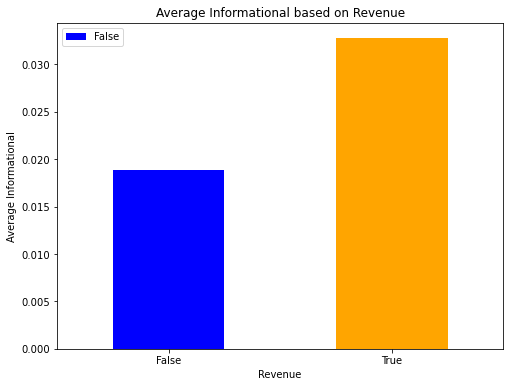

In [12]:
# Calculate average values based on revenue
revenue_info_avg = data.groupby('Revenue')['Informational'].mean()

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
revenue_info_avg.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Revenue')
plt.ylabel('Average Informational')
plt.title('Average Informational based on Revenue')
plt.xticks(rotation=0)
plt.legend(['False', 'True'])
plt.show()






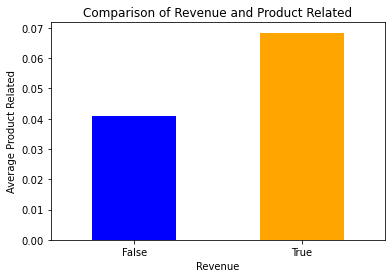

In [13]:
# Group the data by 'Revenue' and calculate the mean of 'Product Related'
grouped_data = data.groupby('Revenue')['ProductRelated'].mean()

# Plot the bar plot
grouped_data.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Revenue')
plt.ylabel('Average Product Related')
plt.title('Comparison of Revenue and Product Related')
plt.xticks(rotation=0)
plt.show()

In [14]:
 #Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['PageValues'], bins=20, alpha=0.5, label='Page Values')
plt.hist(data[data['Revenue'] == True]['PageValues'], bins=20, alpha=0.5, label='Revenue = True')
plt.hist(data[data['Revenue'] == False]['PageValues'], bins=20, alpha=0.5, label='Revenue = False')
plt.xlabel('Page Values')
plt.ylabel('Frequency')
plt.title('Histogram of Page values and Revenue')
plt.legend()
plt.show()

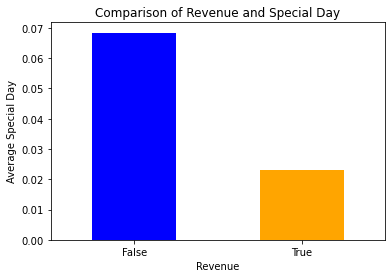

In [15]:

grouped_data = data.groupby('Revenue')['SpecialDay'].mean()

# Plot the bar plot
grouped_data.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Revenue')
plt.ylabel('Average Special Day')
plt.title('Comparison of Revenue and Special Day')
plt.xticks(rotation=0)
plt.show()




In [16]:
operating_system_counts = data['OperatingSystems'].value_counts()

# Create the bar chart
plt.bar(operating_system_counts.index, operating_system_counts.values)

# Customize the plot
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Distribution of Operating Systems')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [17]:
browser_counts = data['Browser'].value_counts()

# Create the bar chart
plt.bar(browser_counts.index, browser_counts.values)

# Customize the plot
plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Distribution of Browsers')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()







In [18]:

region_counts = data['Region'].value_counts()

# Create the pie chart
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Distribution of Sessions by Region')

# Display the plot
plt.show()

In [19]:
x_values = range(len(data['BounceRates']))
y_values = data['BounceRates']
plt.scatter(x_values, y_values)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Bounce Rates')
plt.title('Scatter Plot of Bounce Rates')

# Display the plot
plt.show()


In [20]:
x_values = range(len(data['ExitRates']))
y_values = data['ExitRates']
plt.scatter(x_values, y_values)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Column Values')
plt.title('Scatter Plot of Column')

# Display the plot
plt.show()

# PAIRS OF COLUMNS

In [21]:
#1.

In [22]:
plt.scatter(data['Administrative_Duration'], data['PageValues'])

# Add labels and title
plt.xlabel("Administrative Duration")
plt.ylabel("Page Value")
plt.title("Relationship between Administrative Duration and Page Value")

# Show the plot
plt.show()








In [23]:
#2.

In [24]:
# Create the scatter plot
plt.scatter(data['Informational'], data['ProductRelated_Duration'])

# Add labels and title
plt.xlabel("Informational")
plt.ylabel("Product Related Duration")
plt.title("Relationship between Informational and Product Related Duration")

# Show the plot
plt.show()








In [25]:
#3.

In [26]:
# Extract the relevant columns
bounce_rate = data["BounceRates"]
product_related = data["ProductRelated"]

# Create the scatter plot
plt.scatter(bounce_rate, product_related)

# Add labels and title
plt.xlabel("Product Related")
plt.ylabel("Mean Bounce Rate")
plt.title("Relationship between Bounce Rate and Product Related")

# Show the plot
plt.show()

In [27]:
#4.

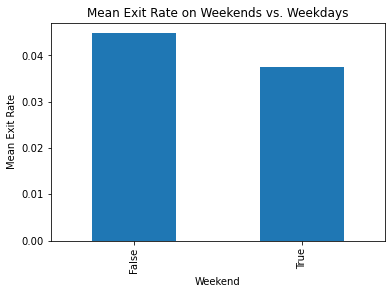

In [28]:
# Extract the relevant columns
weekend = data["Weekend"]
exit_rate = data["ExitRates"]

# Group the data by weekend and calculate the mean exit rate
df_grouped = data.groupby(weekend)["ExitRates"].mean()

# Create the bar chart
df_grouped.plot(kind="bar")

# Add labels and title
plt.xlabel("Weekend")
plt.ylabel("Mean Exit Rate")
plt.title("Mean Exit Rate on Weekends vs. Weekdays")

# Show the plot
plt.show()

In [29]:
#5.

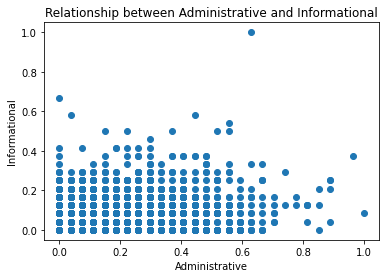

In [30]:
# Extract the relevant columns
administrative = data["Administrative"]
informational = data["Informational"]

plt.scatter(administrative, informational)

# Add labels and title
plt.xlabel("Administrative")
plt.ylabel("Informational")
plt.title("Relationship between Administrative and Informational")

# Show the plot
plt.show()

In [31]:
#6.

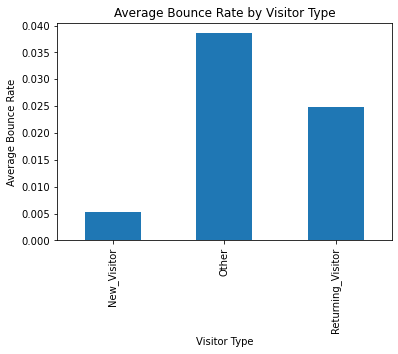

In [32]:
# Extract the relevant columns
visitor_type = data["VisitorType"]
bounce_rate = data["BounceRates"]

# Calculate the average bounce rate for each visitor type
avg_bounce_rate = data.groupby("VisitorType")["BounceRates"].mean()

# Create the bar plot
avg_bounce_rate.plot(kind="bar")

# Add labels and title
plt.xlabel("Visitor Type")
plt.ylabel("Average Bounce Rate")
plt.title("Average Bounce Rate by Visitor Type")

# Show the plot
plt.show()

In [33]:
#7.

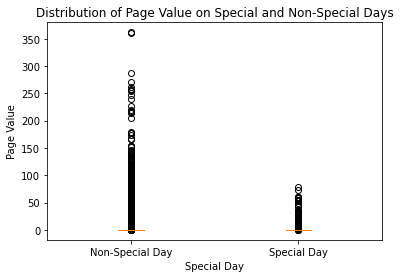

In [34]:
# Extract the relevant columns
special_day = data["SpecialDay"]
page_value = data["PageValues"]

# Create a box plot
plt.boxplot([page_value[special_day == 0], page_value[special_day > 0]], labels=["Non-Special Day", "Special Day"])

# Add labels and title
plt.xlabel("Special Day")
plt.ylabel("Page Value")
plt.title("Distribution of Page Value on Special and Non-Special Days")

# Show the plot
plt.show()

In [35]:
#8.

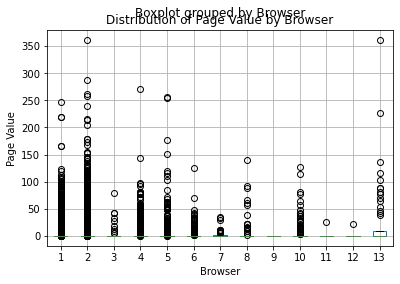

In [36]:
# Extract the relevant columns
browser = data["Browser"]
page_value = data["PageValues"]

# Create a box plot
data.boxplot(column="PageValues", by="Browser")

# Add labels and title
plt.xlabel("Browser")
plt.ylabel("Page Value")
plt.title("Distribution of Page Value by Browser")

# Show the plot
plt.show()

In [37]:
#9.

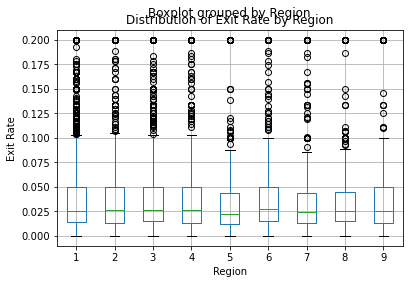

In [38]:
# Extract the relevant columns
region = data["Region"]
exit_rate = data["ExitRates"]

# Create a box plot
data.boxplot(column="ExitRates", by="Region")

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Exit Rate")
plt.title("Distribution of Exit Rate by Region")

# Show the plot
plt.show()

In [39]:
#10.

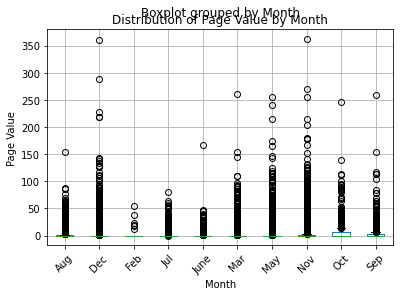

In [40]:
# Extract the relevant columns
month = data["Month"]
page_value = data["PageValues"]

# Create a box plot
data.boxplot(column="PageValues", by="Month", rot=45)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Page Value")
plt.title("Distribution of Page Value by Month")

# Show the plot
plt.show()

# DATA MODELING

In [41]:
#converting categorical values to numeric type
month_mapping = {}
month_values = data["Month"].unique()
for i in range(len(month_values)):
    month_mapping[month_values[i]] = i+1
data['Month'] = data['Month'].map(month_mapping)

visitor_mapping = {}
visitor_values = data["VisitorType"].unique()
for i in range(len(visitor_values)):
    visitor_mapping[visitor_values[i]] = i+1
data['VisitorType'] = data['VisitorType'].map(visitor_mapping)

weekend_mapping = {}
weekend_values = data["Weekend"].unique()
for i in range(len(weekend_values)):
    weekend_mapping[weekend_values[i]] = i+1
data['Weekend'] = data['Weekend'].map(weekend_mapping)

DECISION TREE MODEL

In [42]:
# Finding  features selection  by  hill climbing technique
cols = []
best_score = 0
col_num = data.shape[1] - 1
cols_Random = shuffle(range(0,col_num), random_state=1)
best_columns = []
for c in range(0, col_num):
    cols.append(cols_Random[c])
    columns = [data.columns[i] for i in cols]
    X_train, X_test, y_train, y_test = train_test_split(data[columns],data["Revenue"], test_size=0.2, random_state=1)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < best_score:
        cols.remove(cols_Random[c])
    else:
        best_score = cur_Score
        selected_columns = columns

print("best columns - ", selected_columns)

best columns -  ['Informational_Duration', 'VisitorType', 'PageValues', 'Browser']


Metrics of Decision tree classifier with default parameters
Confusion Matrix
[[1977  138]
 [ 172  179]]
Classification Report
              precision    recall  f1-score   support

       False       0.92      0.93      0.93      2115
        True       0.56      0.51      0.54       351

    accuracy                           0.87      2466
   macro avg       0.74      0.72      0.73      2466
weighted avg       0.87      0.87      0.87      2466


Best Parameters chosen
['entropy', 5, 2]
 Decision tree classifier with tuned parameters
Confusion Matrix
[[1868  247]
 [  96  255]]
 Report
              precision    recall  f1-score   support

       False       0.95      0.88      0.92      2115
        True       0.51      0.73      0.60       351

    accuracy                           0.86      2466
   macro avg       0.73      0.80      0.76      2466
weighted avg       0.89      0.86      0.87      2466

ROC curve with AUC score


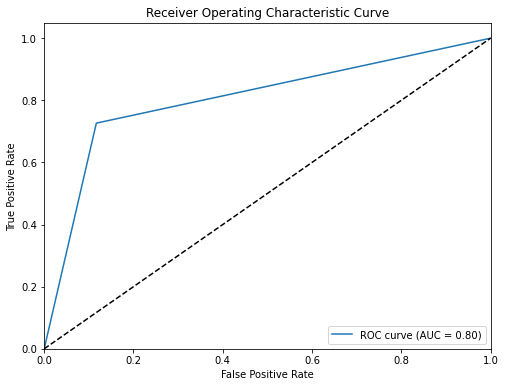

In [43]:
# Making the train test split using the best features selected
X_train, X_test, y_train, y_test = train_test_split(data[selected_columns],data["Revenue"], test_size=0.2, random_state=1)

# Training the Model
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

# Making predictions using the trained model
y_pre = fit.predict(X_test)
print("Metrics of Decision tree classifier with default parameters")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pre))
print("Classification Report")
print(classification_report(y_test,y_pre))

# Parameter tuning
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

best_score = 0
best_parameters = []

for c in param_grid["criterion"]:
    for md in param_grid["max_depth"]:
        for mss in param_grid["min_samples_split"]:
            clf = DecisionTreeClassifier(criterion=c, max_depth=md, min_samples_split=mss, class_weight={False:1, True:5})
            clf.fit(X_train, y_train)
            cur_score = clf.score(X_test, y_test)
            if cur_score>best_score:
                best_score = cur_score
                best_parameters = [c, md, mss]
                
print("\nBest Parameters chosen")
print(best_parameters)

# Training the model using the best parameters
clf = DecisionTreeClassifier(criterion=c, max_depth=md, min_samples_split=mss, class_weight={False:1, True:5})
fit = clf.fit(X_train, y_train)

# Making prediction using the trained model
y_pre = fit.predict(X_test)
print(" Decision tree classifier with tuned parameters")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pre))
print("  Classification_Report")
print(classification_report(y_test,y_pre))

# Plotting the ROC curve with the AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pre)
auc = roc_auc_score(y_test, y_pre)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
print("ROC curve with AUC score")
plt.show()

K Neighnours Model

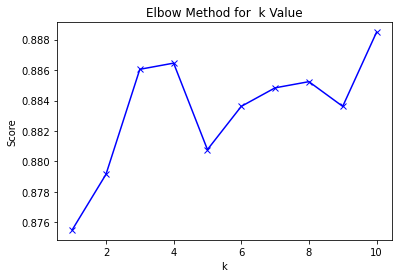

In [44]:
# Using the elbow method to find  the K value
d=[]

X_train, X_test, y_train, y_test = train_test_split(data[selected_columns],data["Revenue"], test_size=0.2, random_state=1)

K = range(1, 11)

for k in K:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    d.append(clf.score(X_test, y_test))

plt.plot(K, d, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Elbow Method for  k Value')
plt.show()

Metrics of K neighbours classifier with default parameters
Confusion Matrix
[[1990  125]
 [ 169  182]]
 Report
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2115
        True       0.59      0.52      0.55       351

    accuracy                           0.88      2466
   macro avg       0.76      0.73      0.74      2466
weighted avg       0.87      0.88      0.88      2466

Metrics of K neighbours classifier with tuned parameters
Confusion Matrix
[[1987  128]
 [ 166  185]]
 Report
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2115
        True       0.59      0.53      0.56       351

    accuracy                           0.88      2466
   macro avg       0.76      0.73      0.74      2466
weighted avg       0.88      0.88      0.88      2466

ROC curve with AUC score


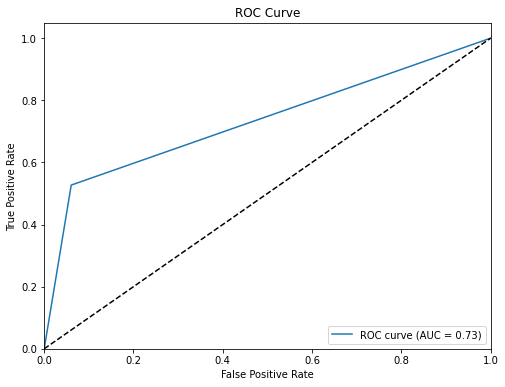

In [45]:
# Training the model
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)

# Making predictions using the trained model
y_pre = fit.predict(X_test)
print("Metrics of K neighbours classifier with default parameters")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pre))
print(" Report")
print(classification_report(y_test,y_pre))

# Training model using tuned parameters
clf = KNeighborsClassifier(n_neighbors=5, weights="distance", p=2)
fit = clf.fit(X_train, y_train)

# Making predictions using the trained model
y_pre = fit.predict(X_test)
print("Metrics of K neighbours classifier with tuned parameters")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pre))
print(" Report")
print(classification_report(y_test,y_pre))

# Plotting the ROC curve with the AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pre)
auc = roc_auc_score(y_test, y_pre)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC curve with AUC score")
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier



#  Select the features and target variable
features = data.drop('Revenue', axis=1)
target = data['Revenue']

#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#  Build the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

#  Make predictions on the test set using the Decision Tree model
y_pred_dt = decision_tree.predict(X_test)

#  Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

#   Train and evaluate the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 neighbors as an example
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_knn)

Decision Tree Accuracy: 0.8495539334955393
K-Nearest Neighbors Classifier Accuracy: 0.8763179237631792
